<a href="https://colab.research.google.com/github/arpit4101/Machine-Learning-Concepts/blob/main/Regularisation%20/Ridge/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

data = load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [ ]:
X = data.data
y = data.target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=45)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
print('r2 score : ', r2_score(y_test, y_pred))
print('rmse : ', np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score :  0.5188113124539249
rmse :  48.72713760953253


In [ ]:
print(lr.coef_)
print(lr.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [ ]:
from sklearn.linear_model import Ridge

r = Ridge(alpha=0.006)
r.fit(X_train, y_train)

y_pred1 = r.predict(X_test)

print('r2 score : ', r2_score(y_test, y_pred1))
print('rmse : ', np.sqrt(mean_squared_error(y_test, y_pred1)))


r2 score :  0.5225929373816101
rmse :  48.53528851873788


In [ ]:
print(r.coef_)
print(r.intercept_)

[  25.59505907 -242.68675598  496.47060388  327.73491919 -538.29483357
  229.90196908   -2.84566168  207.92206271  627.54079114   92.86643037]
152.09419383194313


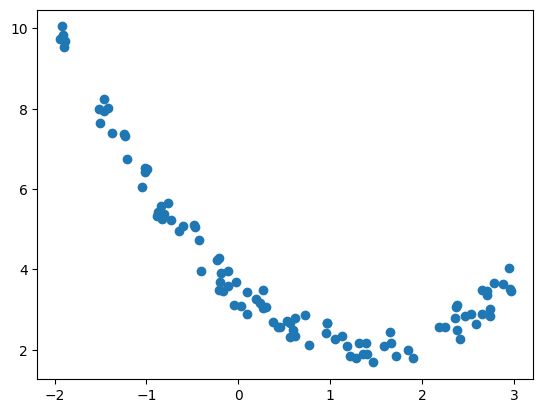

In [ ]:
import matplotlib.pyplot as plt

m =100
x1 = 5 * np.random.rand(m,1) -2
x2 = 0.7*x1**2 - 2*x1 + 3 + np.random.rand(m,1)

plt.scatter(x1,x2)

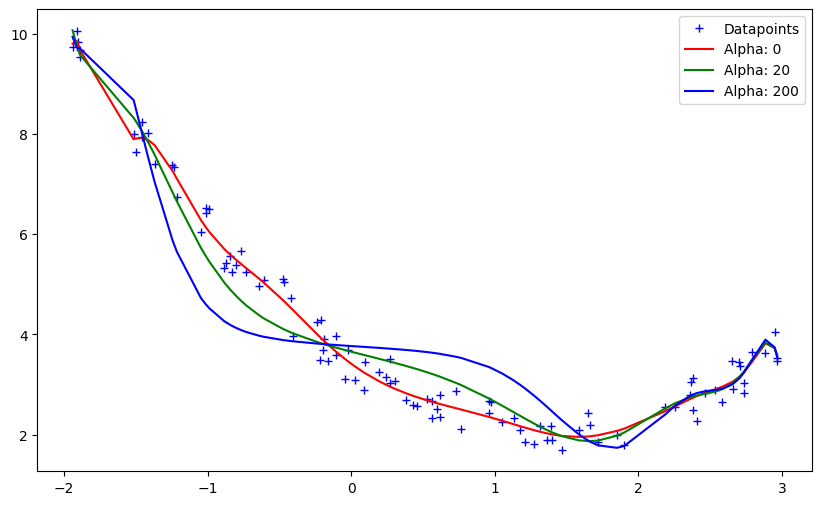

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()